In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

data_folder = "../data"

print(f"Reading data from {data_folder} in file {data_folder}/qiskit.db")

# Connect to the database
conn = sqlite3.connect(f'{data_folder}/qiskit.db')

# Load table into pandas dataframe
df_ref = pd.read_sql_query("SELECT * FROM programs", conn)

# Close the connection
conn.close()

# read files from csv file
df_val = pd.read_csv('../build/times.csv', header=None)

# assign column names
df_val.columns = ['time_ours', 'time_qiskit', 'speedup', 'id']

# merge the two dataframes
df = pd.merge(df_val, df_ref, on='id')

df.drop(columns=['filename'], inplace=True)

# sum tree_building_time_us to both contraction_cpu_time_us and time and drop column
df.drop(columns=['tree_building_time_us'], inplace=True)

qubit_set =  df['n_qubits'].unique()
qubit_set.sort()
qubit_set = qubit_set[::-1]

# choose 6 colors for the qubit numbers and stick to it
colors = { 
    5 : 'tab:olive',
    6 : 'tab:blue', 
    7 : 'tab:orange',
    8 : 'tab:green',
    9 : 'tab:red',
    10 : 'tab:purple'
}


Reading data from ../data in file ../data/qiskit.db


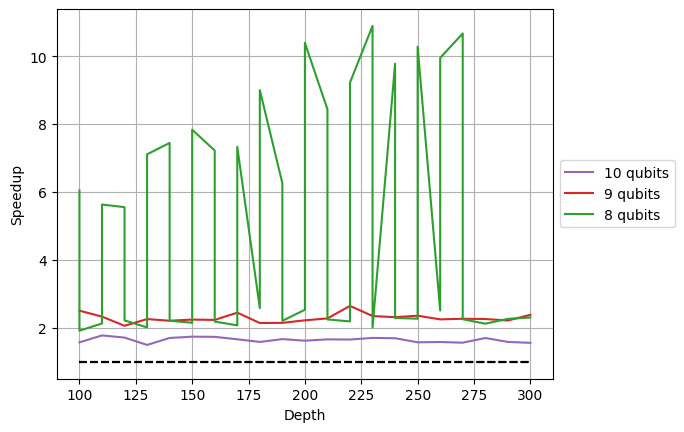

<Figure size 640x480 with 0 Axes>

In [2]:
speedup_formula = lambda qiskit, ours: qiskit / ours

# for each qubit plot the speedup cpu_rust vs qiskit_cpu in function of the depth
for qubit in qubit_set[2:]:
    df_qubit = df[df['n_qubits'] == qubit]
    df_qubit = df_qubit.sort_values(by='depth')

    plt.plot(df_qubit['depth'], speedup_formula(df_qubit['time_qiskit'],  df_qubit['time_ours']), label=f'{qubit} qubits', color=colors[qubit])
    plt.plot(df_qubit['depth'], [1]*len(df_qubit['depth']), color='black', linestyle='--')


plt.xlabel('Depth')
plt.ylabel('Speedup')
# plt.title('Speedup GPU (ours) vs GPU Qiskit')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
# plt.show()
plt.savefig('../build/speedup_gpu_ours_vs_qiskit_lowq.svg', transparent=True, bbox_inches='tight')
plt.clf()

# for each qubit plot the speedup cpu_rust vs qiskit_cpu in function of the depth
for qubit in qubit_set[:3]:
    df_qubit = df[df['n_qubits'] == qubit]
    df_qubit = df_qubit.sort_values(by='depth')

    plt.plot(df_qubit['depth'], speedup_formula(df_qubit['time_qiskit'],  df_qubit['time_ours']), label=f'{qubit} qubits', color=colors[qubit])
    plt.plot(df_qubit['depth'], [1]*len(df_qubit['depth']), color='black', linestyle='--')

plt.xlabel('Depth')
plt.ylabel('Speedup')
# plt.title('Speedup GPU (ours) vs GPU Qiskit')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()
# plt.savefig('../build/speedup_gpu_ours_vs_qiskit_highq.svg', transparent=True, bbox_inches='tight')
plt.clf()